In [2]:
import random
from matplotlib import pyplot as plt
import math
import numpy as np
from scipy import  stats
from scipy.stats import shapiro

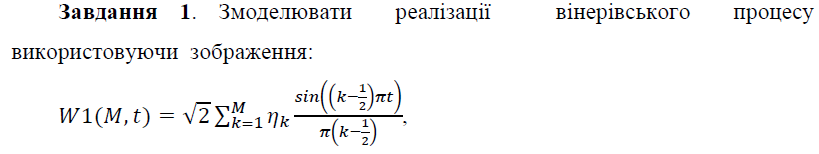

Статистика Шапіро-Вілка (M = 1000): 0.9250056743621826, p-value: 2.6205625545117073e-05
Відхиляємо нульову гіпотезу та приймаємо альтернативну, дані не є нормально розподіленими.
Статистика Шапіро-Вілка (M = 3000): 0.9650174975395203, p-value: 0.009312506765127182
Відхиляємо нульову гіпотезу та приймаємо альтернативну, дані не є нормально розподіленими.
Статистика Шапіро-Вілка (M = 10000): 0.9813703894615173, p-value: 0.16974595189094543
Значення p > 0.05, що не дає можливості відхилити альтернативну гіпотезу, тому можна припустити, що дані з нормального розподілу.


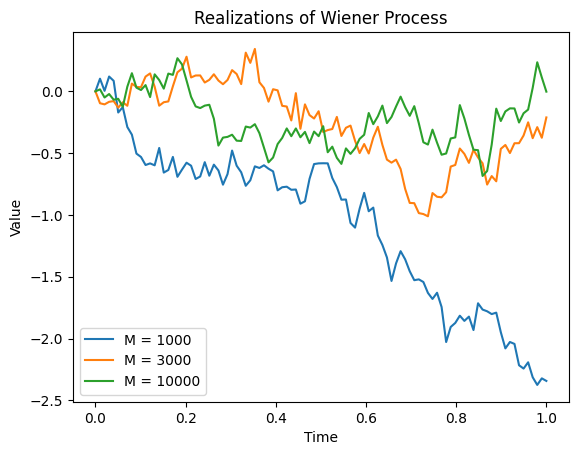

In [6]:
#Завдання 1
M = [1000, 3000, 10_000]
T = np.linspace(0,1,100) #крок 0.01

# Функція для обчислення значень вінерівського процесу
def W1(M, t, gaus_randomed):
    sum = 0
    for k in range(M):
      sum += (gaus_randomed[k]*math.sin(((k-0.5)*math.pi*t)))/(math.pi*(k-0.5))
    return math.sqrt(2)*sum

for m in M:
    gaus_randomed = [random.gauss(0,1) for x in range(m)]
    res = [W1(m, t, gaus_randomed[:m]) for t in T]  
    
    # Побудова графіку для кожного значення M
    plt.plot(T, res, label=f'M = {m}')

    # Перевірити гіпотезу про нармальний закон розподілу приростів отриманих реалізацій за критерієм Шапіро-Вілка
    stat, p_value = shapiro(res)
    print(f"Статистика Шапіро-Вілка (M = {m}): {stat}, p-value: {p_value}")
    if p_value > 0.05:
        print('Значення p > 0.05, що не дає можливості відхилити альтернативну гіпотезу, тому можна припустити, що дані з нормального розподілу.')
    else:
        print('Відхиляємо нульову гіпотезу та приймаємо альтернативну, дані не є нормально розподіленими.')
    
plt.title('Realizations of Wiener Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

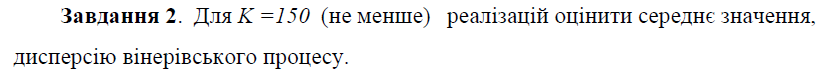

(150, 100)


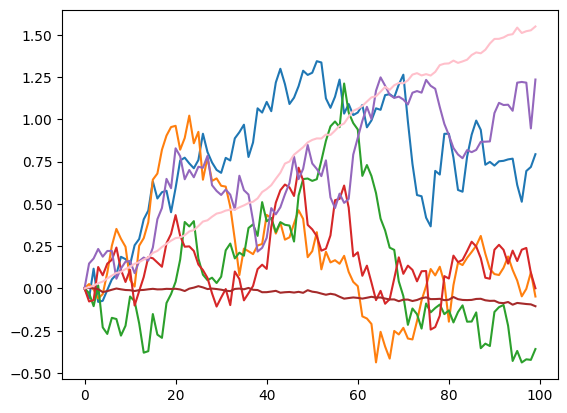

In [7]:
#Завдання 2
M = 10_000
T = np.linspace(0,1,100) #крок 0.01

K = 150

# Функція для обчислення значень вінерівського процесу
def W1():
    etas = [random.gauss(0,1) for x in range(M)]
    def w1(M, t):
        sum = 0
        for k in range(M):
            sum+=(etas[k]*math.sin(((k-0.5)*math.pi*t)))/(math.pi*(k-0.5))
        return math.sqrt(2)*sum
    return [w1(M,t)for t in T]

processes_W = np.array([W1() for x in range(K)])
print(processes_W.shape)
a = [np.mean(processes_W[:,i]) for i in range(100)]
v = [np.var(processes_W[:,i]) for i in range(100)]
for x in processes_W[30:35]:
    plt.plot(x)
plt.plot(a, color ='brown')
plt.plot(v, color ='pink')
plt.show()

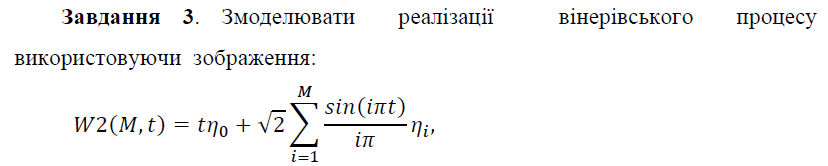

Статистика Шапіро-Вілка: 0.9612220525741577, p-value: 0.004919261205941439
Відхиляємо нульову гіпотезу та приймаємо альтернативну, дані не є нормально розподіленими.


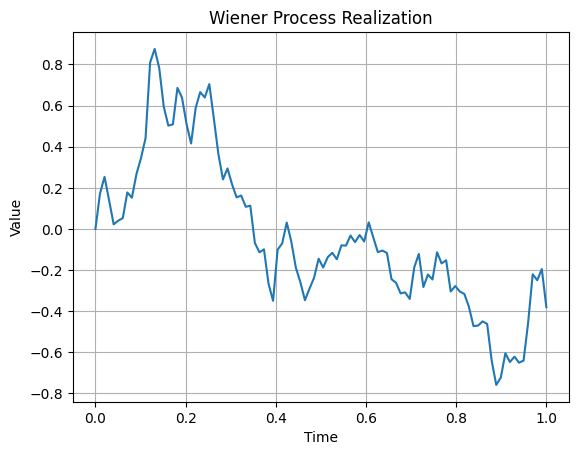

(150, 100)


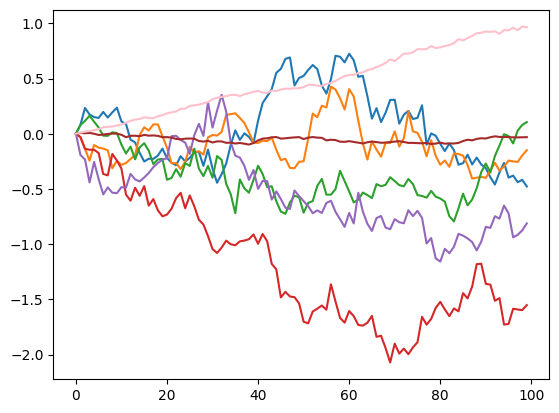

In [8]:
#Завдання 3
M = 10_000
T = np.linspace(0,1,100) #крок 0.01

#реалізація вінерівського процесу за другою формулою
def W2():
    etas = [random.gauss(0,1) for x in range(M)]
    def w2(M, t):
        sum = 0
        for i in range(1, M):
            sum += etas[i] * math.sin(i*math.pi*t) / (i*math.pi)
        return t * etas[0] + math.sqrt(2) * sum
    return [w2(M, t) for t in T]

res = W2()

#перевірка якості отриманих реалізацій
stat, p_value = shapiro(res)
print(f"Статистика Шапіро-Вілка: {stat}, p-value: {p_value}")
if p_value > 0.05:
    print('Значення p > 0.05, що не дає можливості відхилити альтернативну гіпотезу, тому можна припустити, що дані з нормального розподілу.')
else:
    print('Відхиляємо нульову гіпотезу та приймаємо альтернативну, дані не є нормально розподіленими.')

plt.plot(T, res)
plt.title('Wiener Process Realization')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#оцінення середнього значення та дисперсії
processes_W = np.array([W2() for x in range(K)])
print(processes_W.shape)
a = [np.mean(processes_W[:,i]) for i in range(100)]
v = [np.var(processes_W[:,i]) for i in range(100)]
for x in processes_W[30:35]:
    plt.plot(x)
plt.plot(a, color ='brown')
plt.plot(v, color ='pink')
plt.show()

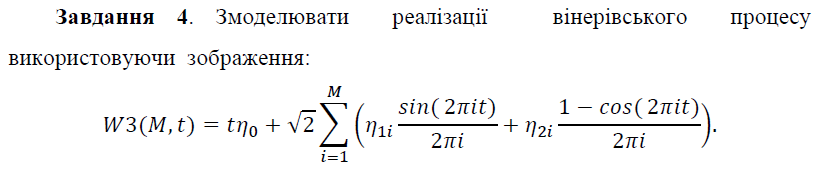

Статистика Шапіро-Вілка: 0.9664210081100464, p-value: 0.011845090426504612
Відхиляємо нульову гіпотезу та приймаємо альтернативну, дані не є нормально розподіленими.


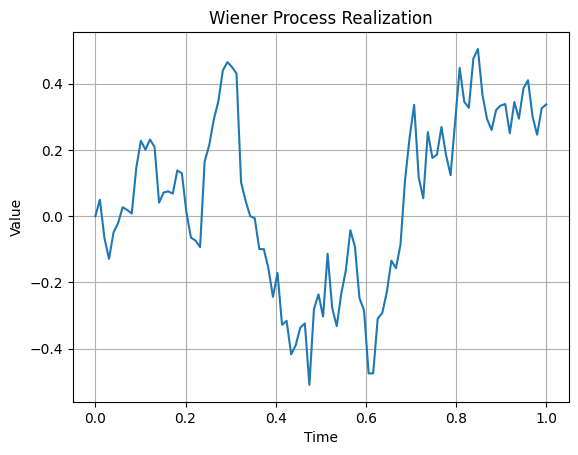

(150, 100)


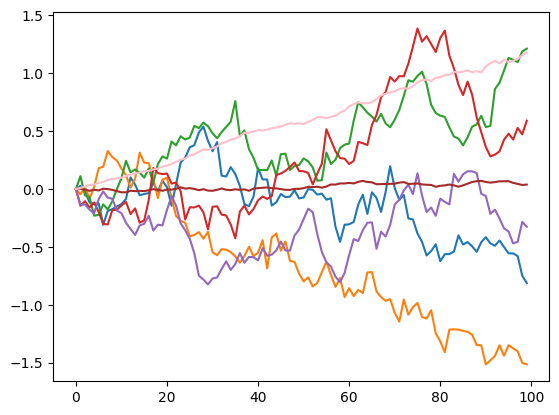

In [10]:
#Завдання 4
M = 10_000
T = np.linspace(0,1,100) #крок 0.01

#реалізація вінерівського процесу
def W3():
    etas1 = [random.gauss(0,1) for x in range(M)]
    etas2 = [random.gauss(0,1) for x in range(M)]
    def w3(M, t):
        sum = 0
        for i in range(1, M):
            sum += etas1[i] * math.sin(2*i*math.pi*t) / (2*i*math.pi) + etas2[i] * (1-math.cos(2*i*math.pi*t)) / (2*i*math.pi)
        return t * etas1[0] + math.sqrt(2) * sum
    return [w3(M, t) for t in T]

res = W3()

#перевірка якості отриманих реалізацій
stat, p_value = shapiro(res)
print(f"Статистика Шапіро-Вілка: {stat}, p-value: {p_value}")
if p_value > 0.05:
    print('Значення p > 0.05, що не дає можливості відхилити альтернативну гіпотезу, тому можна припустити, що дані з нормального розподілу.')
else:
    print('Відхиляємо нульову гіпотезу та приймаємо альтернативну, дані не є нормально розподіленими.')

plt.plot(T, res)
plt.title('Wiener Process Realization')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#оцінення середнього значення та дисперсії
processes_W = np.array([W3() for x in range(K)])
print(processes_W.shape)
a = [np.mean(processes_W[:,i]) for i in range(100)]
v = [np.var(processes_W[:,i]) for i in range(100)]
for x in processes_W[30:35]:
    plt.plot(x)
plt.plot(a, color ='brown')
plt.plot(v, color ='pink')
plt.show()

(200, 2, 100)


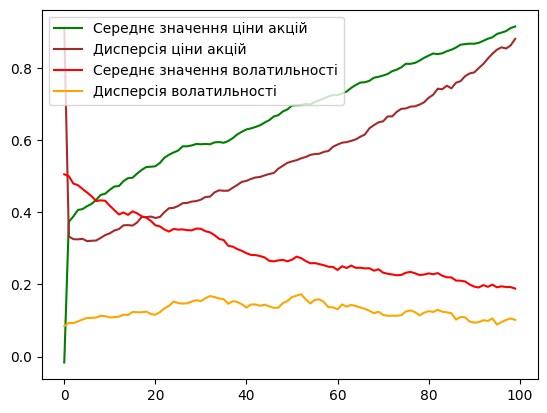

In [11]:
#Завдання 5 - змоделювати ціни акцій та волатильності 
#кількість доданків для зображень вінерівського процесу
M = 5000
T = np.linspace(0, 1, 100)

def W1():
    etas = [random.gauss(0,1) for x in range(M)]
    def w1(M, t):
        sum = 0
        for k in range(M):
            sum+=(etas[k]*math.sin(((k-0.5)*math.pi*t)))/(math.pi*(k-0.5))
        return math.sqrt(2)*sum
    return [w1(M,t)for t in T]

def W2():
    etas = [random.gauss(0,1) for x in range(M)]
    def w2(M, t):
        sum = 0
        for i in range(1, M):
            sum += etas[i] * math.sin(i*math.pi*t) / (i*math.pi)
        return t * etas[0] + math.sqrt(2) * sum
    return [w2(M, t) for t in T]

def W3():
    etas1 = [random.gauss(0,1) for x in range(M)]
    etas2 = [random.gauss(0,1) for x in range(M)]
    def w3(M, t):
        sum = 0
        for i in range(1, M):
            sum += etas1[i] * math.sin(2*i*math.pi*t) / (2*i*math.pi) + etas2[i] * (1-math.cos(2*i*math.pi*t)) / (2*i*math.pi)
        return t * etas1[0] + math.sqrt(2) * sum
    return [w3(M, t) for t in T]


def model(W1, W2, mu, k, teta, ksi):
    #початкові значення
    sigma_0 = random.uniform(0, 1)
    S_0 = random.gauss(0, 1) 
    delta_t = T[1]-T[0] #крок
    
    #моделювання значень ціни акцій та волатильності
    S = [S_0]
    sigma = [sigma_0]
    for t in range(0, len(T)-1):
        S_new = max(S[t] + mu * S[t] * delta_t + math.sqrt(sigma[t]) * (W1[t+1] - W1[t]), 0)
        S.append(S_new)
        sigma_new = max(sigma[t] + k * (teta - sigma[t]) * delta_t + ksi * math.sqrt(sigma[t]) * (W2[t+1] - W2[t]), 0)
        sigma.append(sigma_new)
        
    return S, sigma

#Оцінюємо середнє значення та дисперсію для ціни акцій та волатильності (для K>150 реалізацій).
K = 200
processes = np.array([model(W1(), W2(), 0.4, 2, 0.1, 1.3) for x in range(K)])
print(processes.shape)
m1 = [np.mean(processes[:, 0, i]) for i in range(100)]
v1 = [np.var(processes[:, 0, i]) for i in range(100)]
m2 = [np.mean(processes[:, 1, i]) for i in range(100)]
v2 = [np.var(processes[:, 1, i]) for i in range(100)]

plt.plot(m1, color ='green', label = "Середнє значення ціни акцій")
plt.plot(v1, color ='brown', label = "Дисперсія ціни акцій")
plt.plot(m2, color ='red', label = "Середнє значення волатильності")
plt.plot(v2, color ='orange', label = "Дисперсія волатильності")
plt.legend()
plt.show()

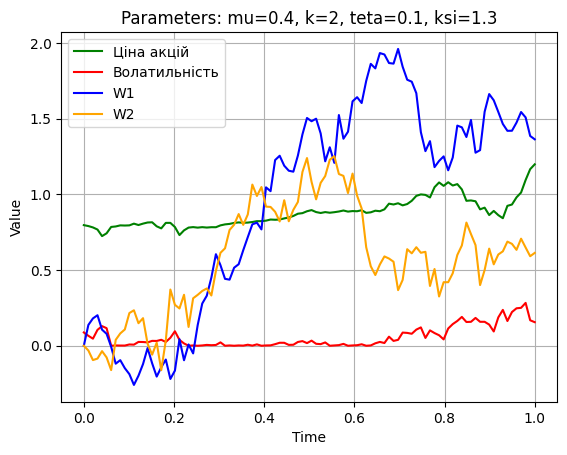

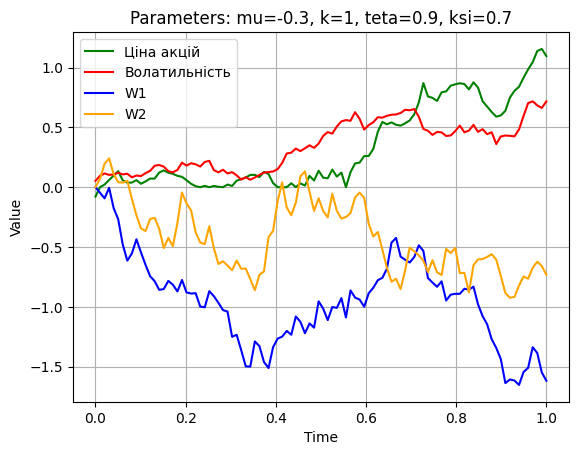

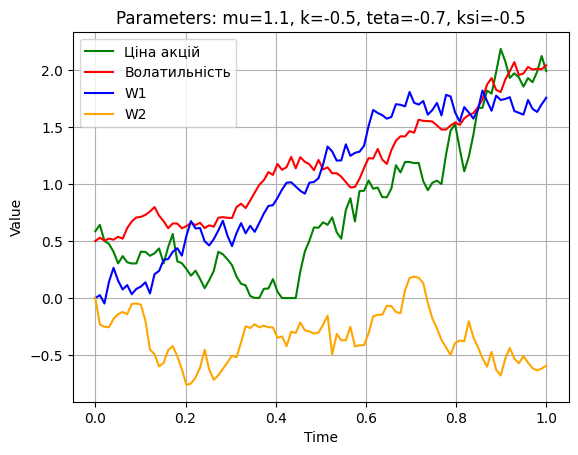

In [13]:
#Провести моделювання для всіх трьох зображень вінерівського процесу для різних значень параметрів моделі Хестона
params = [
    {"mu": 0.4, "k": 2, "teta": 0.1, "ksi": 1.3},
    {"mu": -0.3, "k": 1, "teta": 0.9, "ksi": 0.7},
    {"mu": 1.1, "k": -0.5, "teta": -0.7, "ksi": -0.5}
]

# W1, W2
for param in params:
    mu = param["mu"]
    k = param["k"]
    teta = param["teta"]
    ksi = param["ksi"]
    res1 = model(W1(), W2(), mu, k, teta, ksi)
    plt.plot(T, res1[0], color = "green", label = "Ціна акцій")
    plt.plot(T, res1[1], color = "red", label = "Волатильність")
    plt.plot(T, W1(), color = "blue", label = "W1")
    plt.plot(T, W2(), color = "orange", label = "W2")
    plt.title(f'Parameters: mu={mu}, k={k}, teta={teta}, ksi={ksi}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

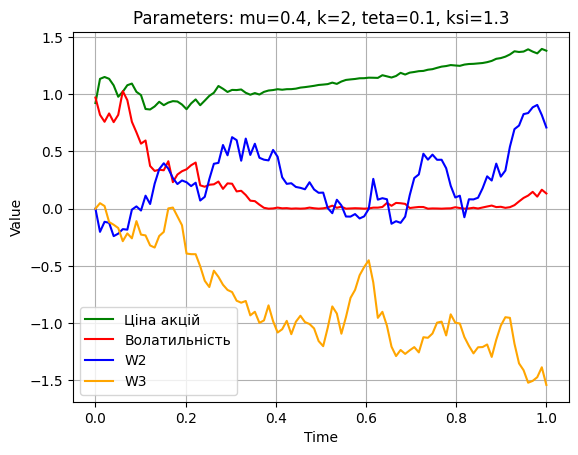

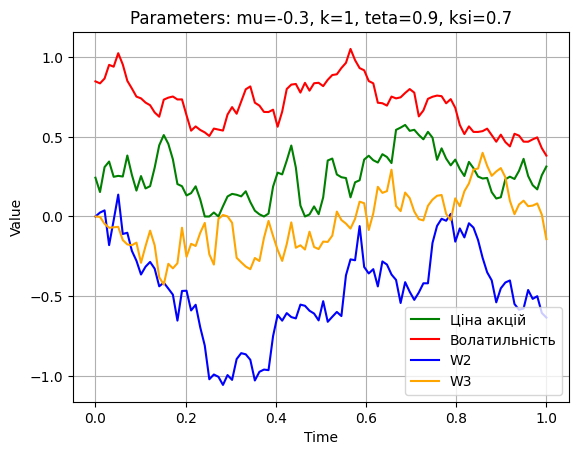

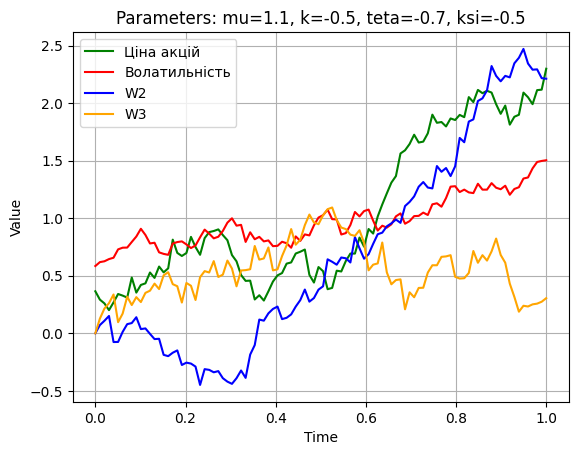

In [14]:
# W2, W3
for param in params:
    mu = param["mu"]
    k = param["k"]
    teta = param["teta"]
    ksi = param["ksi"]
    res1 = model(W2(), W3(), mu, k, teta, ksi)
    plt.plot(T, res1[0], color = "green", label = "Ціна акцій")
    plt.plot(T, res1[1], color = "red", label = "Волатильність")
    plt.plot(T, W2(), color = "blue", label = "W2")
    plt.plot(T, W3(), color = "orange", label = "W3")
    plt.title(f'Parameters: mu={mu}, k={k}, teta={teta}, ksi={ksi}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

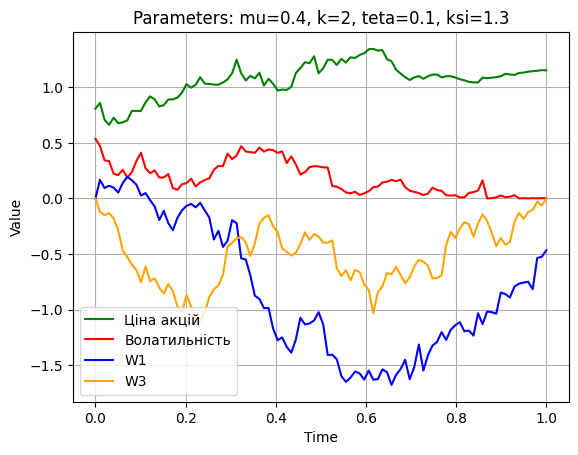

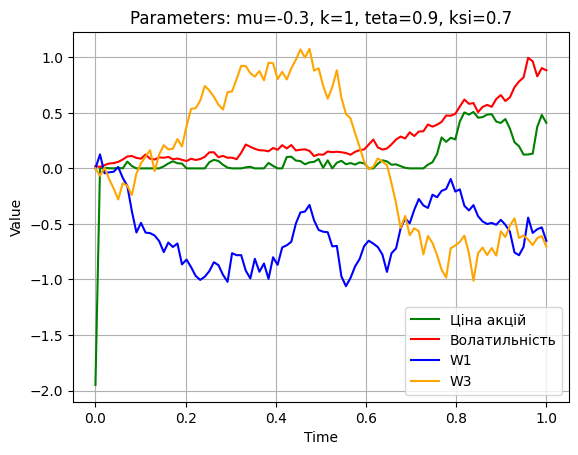

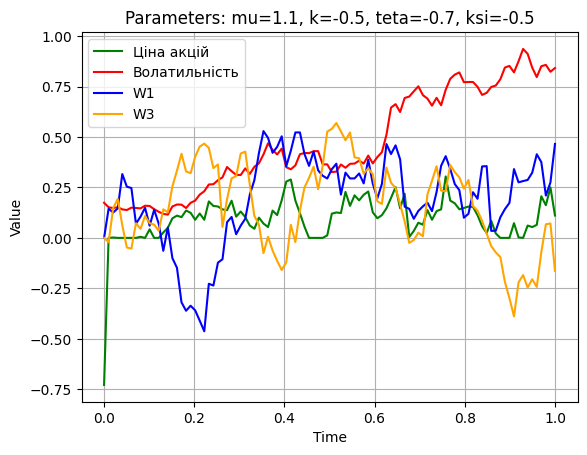

In [15]:
# W1, W3
for param in params:
    mu = param["mu"]
    k = param["k"]
    teta = param["teta"]
    ksi = param["ksi"]
    res1 = model(W1(), W3(), mu, k, teta, ksi)
    plt.plot(T, res1[0], color = "green", label = "Ціна акцій")
    plt.plot(T, res1[1], color = "red", label = "Волатильність")
    plt.plot(T, W1(), color = "blue", label = "W1")
    plt.plot(T, W3(), color = "orange", label = "W3")
    plt.title(f'Parameters: mu={mu}, k={k}, teta={teta}, ksi={ksi}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()